In [1]:
from PIL import Image

# 基本

In [2]:
from PIL import Image
# 打开
img = Image.open('../image/20220923201825.jpg')

In [3]:
# 属性
print(img.mode, img.size, img.format)
# RGB (481, 321) JPEG

RGB (58, 28) JPEG


- mode 
  
  属性为图片的模式，RGB 代表彩色图像，L 代表光照图像也即灰度图像等

- size 
  
  属性为图片的大小 **(宽度W，高度H)**, 这个和其他的库顺序不一样

- format 
  
  属性为图片的格式，如常见的 PNG、JPEG 等

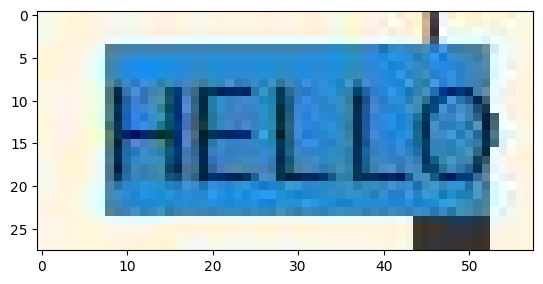

In [4]:
# 图片编辑器显示
img.show()

# matplotlib
import matplotlib.pyplot as plt
plt.imshow(img)

# 也可以直接在jupyter notebook 显示
img

In [5]:
# 保存
img.save('1.jpg')

#  转换图片模式

In [6]:
# 灰度图
im = img.convert('L')
im

# 通道分离合并

L


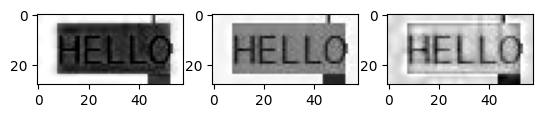

In [7]:
# 3个灰度图
r, g, b = img.split()
print(r.mode)

fig, axs = plt.subplots(1, 3)
axs[0].imshow(r, cmap='gray')
axs[1].imshow(g, cmap='gray')
axs[2].imshow(b, cmap='gray')

In [8]:
im = Image.merge('RGB', (r, g, b))
im

# 和 Numpy 数组之间的转化

In [9]:
import numpy as np
array = np.array(img)
print(array.shape)

(28, 58, 3)


In [10]:
out = Image.fromarray(array)
out

# 裁剪

In [11]:
# 左上角 X 坐标、Y 坐标，右下角 X 坐标、Y 坐标
box = (0, 0, 30, 30)
im = img.crop(box)
im

# 旋转

/tmp/ipykernel_261887/265884008.py:1: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  im1 = img.transpose(Image.FLIP_LEFT_RIGHT) # 左右翻转
/tmp/ipykernel_261887/265884008.py:2: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  im2 = img.transpose(Image.FLIP_TOP_BOTTOM) # 上下翻转
/tmp/ipykernel_261887/265884008.py:3: DeprecationWarning: ROTATE_180 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_180 instead.
  im3 = img.transpose(Image.ROTATE_180)      # 180,
/tmp/ipykernel_261887/265884008.py:4: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  im4 = img.transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_TOP_BOTTOM) # 左右+上下翻转=180
/tmp/ipykernel_261887/265884008.py:4: DeprecationWarning: FLIP_TOP

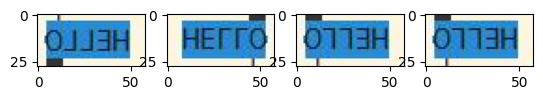

In [12]:
im1 = img.transpose(Image.FLIP_LEFT_RIGHT) # 左右翻转
im2 = img.transpose(Image.FLIP_TOP_BOTTOM) # 上下翻转
im3 = img.transpose(Image.ROTATE_180)      # 180, 
im4 = img.transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_TOP_BOTTOM) # 左右+上下翻转=180



fig, axs = plt.subplots(1, 4)
axs[0].imshow(im1)
axs[1].imshow(im2)
axs[2].imshow(im3)
axs[3].imshow(im4)

In [13]:
im = img.rotate(45)
im

# 改变大小

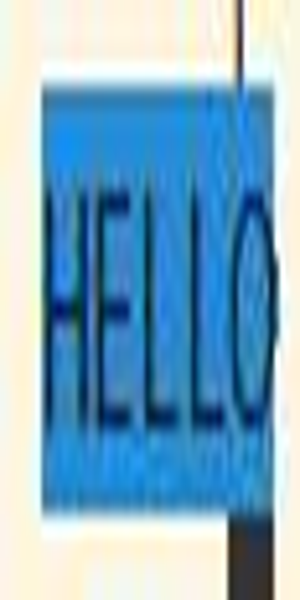

In [14]:
# （W， H）
im = img.resize((300, 600))
im

# 粘贴

In [20]:
img.paste(img.crop(box), (10, 10))
img

# 像素

In [6]:
img.getpixel((1, 2))

(245, 249, 232)

In [14]:
pixels = img.load()
pixels[1,2]

(245, 249, 232)

In [21]:
for i in range(10):
    for j in range(10):
        img.putpixel((i, j), (255, 255, 0))
img

In [ ]:
im = img.point(lambda i: i * 1.5) # 对每个像素值乘以 1.5
im

In [ ]:
im = img.split()
im = im[2].point(lambda i: i > 128 and 255) # 对 B 通道进行二值化
im